__Research Q:__ <br> Out of all accidents that occur in intersections what is the distribution of accidents by intersection type?

In [28]:
import missingno as msno

import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [29]:
accidentsdf = pd.read_csv('Multnomah.csv',low_memory=False)

In [37]:
l = accidentsdf.columns
for m in l:
    print(m, end='|')

Crash ID|Record Type|Vehicle ID|Participant ID|Participant Display Seq#|Vehicle Coded Seq#|Participant Vehicle Seq#|Serial #|Crash Month|Crash Day|Crash Year|Week Day Code|Crash Hour|County Code|City Section ID|Urban Area Code|Functional Class Code|NHS Flag|Highway Number|Highway Suffix|Roadway Number|Highway Component|Mileage Type|Connection Number|Linear Reference System (LRS)|Latitude Degrees|Latitude Minutes|Latitude Seconds|Longitude Degrees|Longitude Minutes|Longitude Seconds|Special Jurisdiction|Jurisdiction Group|Street Number|Nearest Intersecting Street Number|Intersection Sequence Number|Distance from Intersection|Direction From Intersection|Milepoint|Posted Speed Limit|Road Character|Off Roadway Flag|Intersection Type|Intersection Related Flag|Roundabout Flag|Driveway Related Flag|Number of Lanes|Number of Turning Legs|Median Type|Impact Location|Crash Type|Collision Type|Crash Severity|Weather Condition|Road Surface Condition|Light Condition|Traffic Control Device (TCD)|TCD

In [ ]:
msno.matrix(accidentsdf,color=(.3, .3, .5))

In [16]:
accidentsdf['Intersection Type'].unique()

array([' ', nan, '1', '3', '5', '4', '6', '2', '0'], dtype=object)

In [39]:
usedcol = ['Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID',
           'Crash Year','Nearest Intersecting Street Number']
accidentsdf = accidentsdf[usedcol].dropna().reset_index()
# accidentsdf.columns = ['Old Index','Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID','Crash Year','']
accidentsdf.to_csv('accidentintersections.csv')

In [40]:
accidentsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54208 entries, 0 to 54207
Data columns (total 8 columns):
index                                 54208 non-null int64
Crash Type                            54208 non-null object
Collision Type                        54208 non-null object
Crash Severity                        54208 non-null float64
Intersection Type                     54208 non-null object
Crash ID                              54208 non-null int64
Crash Year                            54208 non-null float64
Nearest Intersecting Street Number    54208 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


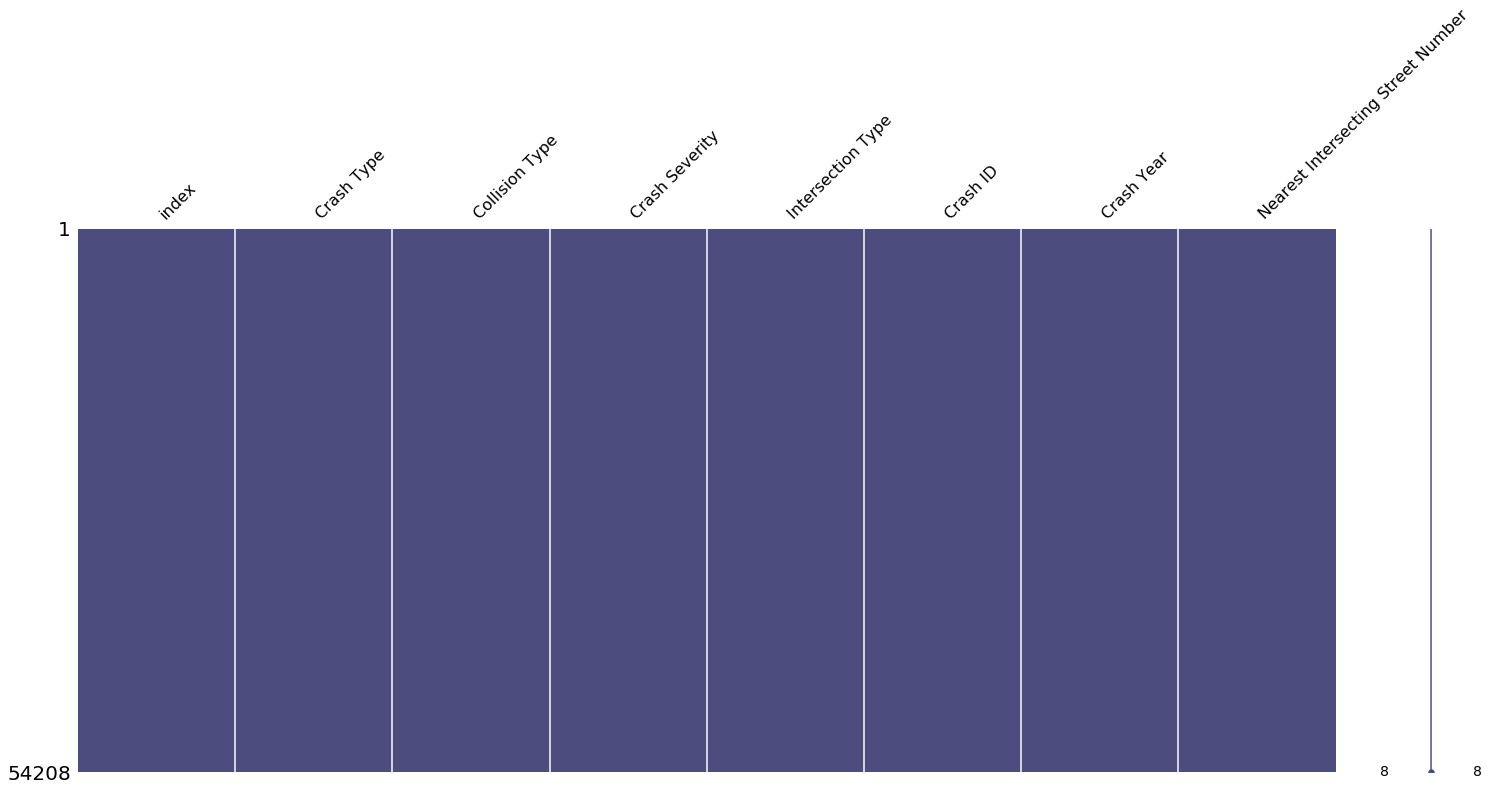

In [41]:
msno.matrix(accidentsdf,color=(.3, .3, .5))
plt.show()

In [42]:
types = dict(accidentsdf['Intersection Type'].value_counts())

In [43]:
types

{' ': 27127,
 '1': 18011,
 '3': 7300,
 '5': 860,
 '4': 655,
 '6': 155,
 '0': 57,
 '2': 43}

In [23]:
k = list(types.keys())
i = list(types.values())

In [24]:
print(k)

[' ', '1', '3', '5', '4', '6', '0', '2']


In [25]:
print(i)

[27127, 18011, 7300, 860, 655, 155, 57, 43]


<BarContainer object of 7 artists>

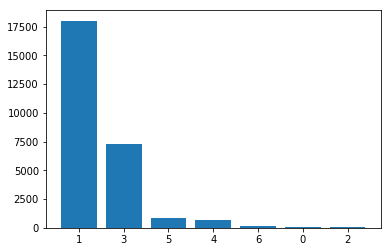

In [26]:
plt.bar(x=k[1:],height=i[1:])

In [57]:
accidentsdf

,index,Crash Type,Collision Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number
0,0,8,9,5.0,,1449628,2012.0,5142
1,5,3,0,4.0,,1449632,2012.0,5111
2,9,2,5,5.0,1,1449640,2012.0,5112
3,14,B,1,4.0,1,1449642,2012.0,5102
4,20,2,5,5.0,,1449649,2012.0,5079
5,25,2,1,5.0,,1449655,2012.0,5090
6,29,2,5,5.0,,1449658,2012.0,5065
7,33,2,5,5.0,,1449661,2012.0,248
8,37,B,6,4.0,1,1449662,2012.0,5119
9,43,B,1,5.0,1,1449663,2012.0,5028


In [61]:
accidentsdf[accidentsdf['Nearest Intersecting Street Number'] == '9101']

,index,Crash Type,Collision Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number
27,132,E,3,4.0,,1449739,2012.0,9101
28,139,E,3,4.0,3,1449740,2012.0,9101
179,921,8,9,4.0,,1450333,2012.0,9101
2195,11442,8,9,4.0,,1458966,2012.0,9101
3426,17871,C,5,5.0,,1463601,2012.0,9101
3874,20237,E,3,5.0,6,1465644,2012.0,9101
4222,22056,C,5,4.0,,1467457,2012.0,9101
4338,22663,E,3,4.0,,1467979,2012.0,9101
4667,24405,E,3,5.0,1,1469779,2012.0,9101
5036,26310,E,3,4.0,,1470895,2012.0,9101


In [62]:
accidentsdf['Crash Type'].unique()

array(['8', '3', '2', 'B', 'E', 'C', 'H', '6', 'A', 'F', 'D', '7', 'G',
       '9', 'J', 'I', '&', '0', '4', '1'], dtype=object)

In [ ]:
accidentsdf